In [44]:
from PIL import Image, ImageDraw


def draw_grid(images, grid_size, cell_size):
    """
    绘制一个图片显示格子
    images: 包含要显示在每个格子中的图像的列表
    grid_size: 格子的行数和列数，形如 (cols, rows)
    cell_size: 每个格子的大小，形如 (width, height)
    返回绘制好的图片对象
    """
    # 计算画布大小
    canvas_size = (grid_size[0] * cell_size[0], grid_size[1] * cell_size[1])
    # 创建新的画布
    canvas = Image.new("RGB", canvas_size, (255, 255, 255))
    # 创建绘制对象
    draw = ImageDraw.Draw(canvas)

    # 在每个格子中绘制图像
    for i, img in enumerate(images):
        row = i // grid_size[0]
        col = i % grid_size[0]
        # 计算图像在画布中的位置
        x0 = col * cell_size[0]
        y0 = row * cell_size[1]
        x1 = x0 + cell_size[0]
        y1 = y0 + cell_size[1]
        # 将图像调整为格子大小
        img = img.resize(cell_size)
        # 在画布上绘制图像
        canvas.paste(img, (x0, y0, x1, y1))
        # 绘制格子线
        draw.rectangle([x0, y0, x1, y1], outline=(0, 0, 0))

    return canvas

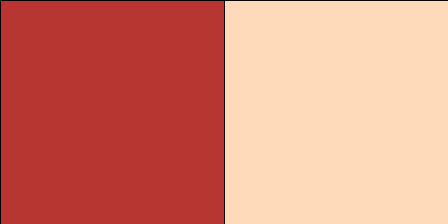

In [70]:

# 设置图片尺寸和颜色
width = 224
height = 224
size = (width, height)

color1 = (183, 54, 49)  # 暗红
color2 = (255, 218, 185)  # 肉色

# 生成图片
img1 = Image.new("RGB", size, color1)
img2 = Image.new("RGB", size, color2)

# 定义网格大小和每个格子的大小
grid_size = (2, 1)
cell_size = size

images = [img1, img2]
show_imgs = draw_grid(images, grid_size, cell_size)
show_imgs
# img2

# 保存图片
# img.save("color_image.png")

# print("图片生成成功！")

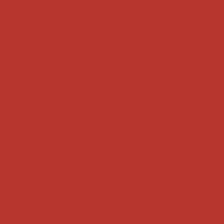

In [68]:
blend_alpha = 0.25
blended_image = Image.blend(img1, img2, blend_alpha)
blended_image

In [48]:
with open("save_color_paras.txt", "a") as f:
    f.write("淡红 " + str(color1) + ' ' + str(color2) + ' ' + str(blend_alpha) + '\n')